# CALISTIR


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("../Data/data.csv")
df.head()

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TIME               299 non-null    int64  
 1   Event              299 non-null    int64  
 2   Gender             299 non-null    int64  
 3   Smoking            299 non-null    int64  
 4   Diabetes           299 non-null    int64  
 5   BP                 299 non-null    int64  
 6   Anaemia            299 non-null    int64  
 7   Age                299 non-null    float64
 8   Ejection.Fraction  299 non-null    int64  
 9   Sodium             299 non-null    int64  
 10  Creatinine         299 non-null    float64
 11  Pletelets          299 non-null    float64
 12  CPK                299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [76]:
df.groupby('Event').count()

,TIME,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
Event,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


In [77]:
x = df.drop(columns=["Event"])
y = df["Event"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# CALISTIRMA

In [59]:
y_train.count()

209

In [60]:
y_test.count()

90

In [61]:
y_train.groupby(df['Event']).count()

Event
0    146
1     63
Name: Event, dtype: int64

In [62]:
y_test.groupby(df['Event']).count()

Event
0    57
1    33
Name: Event, dtype: int64

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    "Feature": x.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)


In [64]:
feature_importances


,Feature,Importance
0,TIME,0.378150
9,Creatinine,0.128340
6,Age,0.099112
11,CPK,0.088972
7,Ejection.Fraction,0.086521
10,Pletelets,0.083866
8,Sodium,0.066281
3,Diabetes,0.015511
4,BP,0.014744
1,Gender,0.014286


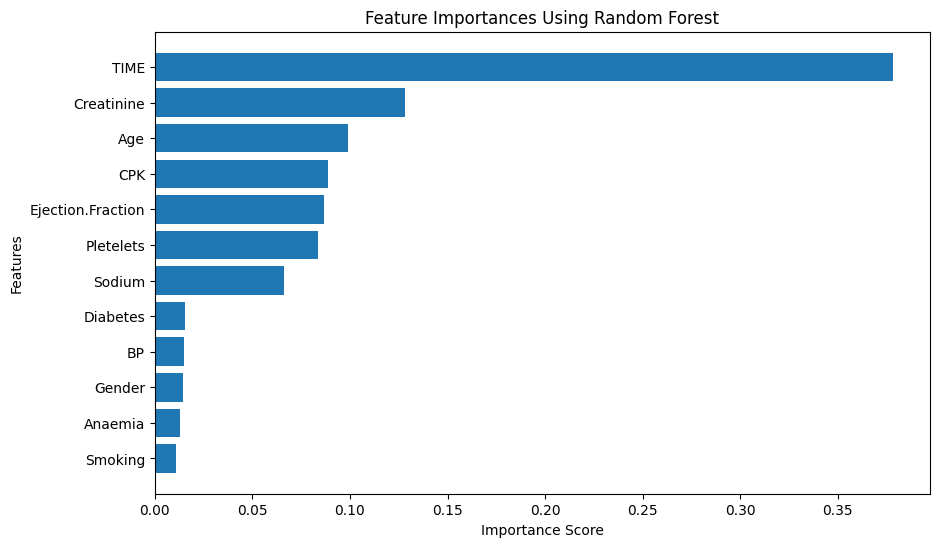

In [65]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], align='center')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances Using Random Forest")
plt.gca().invert_yaxis()
plt.show()

# DECISION TREE

In [79]:
from decision_tree import trainDT

dt_metrics = trainDT(X_train, X_test, y_train, y_test)
dt_metrics

Model Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


{'accuracy': [0.7555555555555555],
 'precision': [0.6896551724137931],
 'recall': [0.6060606060606061],
 'f1': [0.6451612903225806]}

In [80]:
from decision_tree import trainDTGrid

dt_grid_metrics = trainDTGrid(X_train, X_test, y_train, y_test)
dt_grid_metrics

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


{'accuracy': [0.7777777777777778],
 'precision': [0.7241379310344828],
 'recall': [0.6363636363636364],
 'f1': [0.6774193548387096]}

In [81]:
from decision_tree import trainDTSMOTE

dt_smote_metrics = trainDTSMOTE(X_train, X_test, y_train, y_test)
dt_smote_metrics

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        57
           1       0.69      0.73      0.71        33

    accuracy                           0.78        90
   macro avg       0.76      0.77      0.76        90
weighted avg       0.78      0.78      0.78        90



{'accuracy': [0.7777777777777778],
 'precision': [0.6857142857142857],
 'recall': [0.7272727272727273],
 'f1': [0.7058823529411765]}

In [82]:
from decision_tree import trainDTSMOTEGrid

dt_smote_grid_metrics = trainDTSMOTEGrid(X_train, X_test, y_train, y_test)
dt_smote_grid_metrics

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2}


{'accuracy': [0.8111111111111111],
 'precision': [0.8333333333333334],
 'recall': [0.6060606060606061],
 'f1': [0.7017543859649122]}

# ADABOOST

In [11]:
from ada_boost import trainAda

ada_metrics = trainAda(X_train, X_test, y_train, y_test)
ada_metrics

Model Parameters: {'algorithm': 'SAMME.R', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__random_state': 42, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=42), 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 42}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'accuracy': [0.7555555555555555],
 'precision': [0.6896551724137931],
 'recall': [0.6060606060606061],
 'f1': [0.6451612903225806]}

In [12]:
from ada_boost import trainAdaGrid

ada_grid_metrics = trainAdaGrid(X_train, X_test, y_train, y_test)
ada_grid_metrics

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R

Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'accuracy': [0.8222222222222222],
 'precision': [0.9473684210526315],
 'recall': [0.5454545454545454],
 'f1': [0.6923076923076923]}

In [13]:
from ada_boost import trainAdaSMOTE

ada_smote_metrics = trainAdaSMOTE(X_train, X_test, y_train, y_test)
ada_smote_metrics

Model Parameters: {'algorithm': 'SAMME.R', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'entropy', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 10, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__random_state': 42, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=10, random_state=42), 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 42}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'accuracy': [0.8111111111111111],
 'precision': [0.8333333333333334],
 'recall': [0.6060606060606061],
 'f1': [0.7017543859649122]}

In [14]:
from ada_boost import trainAdaSMOTEGrid

ada_smote_grid_metrics = trainAdaSMOTEGrid(X_train, X_test, y_train, y_test)
ada_smote_grid_metrics

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R

Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100}


{'accuracy': [0.8444444444444444],
 'precision': [0.8518518518518519],
 'recall': [0.696969696969697],
 'f1': [0.7666666666666667]}

# LOGISTIC REGRESSION

In [15]:
from logistic_reg import trainLR

lr_metrics = trainLR(X_train, X_test, y_train, y_test)
lr_metrics

Model Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'accuracy': [0.8222222222222222],
 'precision': [0.84],
 'recall': [0.6363636363636364],
 'f1': [0.7241379310344828]}

In [16]:
from logistic_reg import trainLRGrid

lr_grid_metrics = trainLRGrid(X_train, X_test, y_train, y_test)
lr_grid_metrics

Fitting 5 folds for each of 2800 candidates, totalling 14000 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

Best Parameters: {'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.69860627 0.69860627 0.69860627]
  warnings.warn(


{'accuracy': [0.8111111111111111],
 'precision': [0.9],
 'recall': [0.5454545454545454],
 'f1': [0.6792452830188679]}

In [17]:
from logistic_reg import trainLRSMOTE

lr_smote_metrics = trainLRSMOTE(X_train, X_test, y_train, y_test)
lr_smote_metrics

Model Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'accuracy': [0.8333333333333334],
 'precision': [0.8461538461538461],
 'recall': [0.6666666666666666],
 'f1': [0.7457627118644068]}

In [18]:
from logistic_reg import trainLRSMOTEGrid

lr_smote_grid_metrics = trainLRSMOTEGrid(X_train, X_test, y_train, y_test)
lr_smote_grid_metrics

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Fitting 5 folds for each of 2800 candidates, totalling 14000 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework

Best Parameters: {'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
9100 fits failed out of a total of 14000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1446 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Libra

{'accuracy': [0.8333333333333334],
 'precision': [0.8461538461538461],
 'recall': [0.6666666666666666],
 'f1': [0.7457627118644068]}

# STOCHASTIC GRADIENT CLASSIFIER

In [19]:
from stochastic_gradient import trainSGD

sgd_metrics = trainSGD(X_train, X_test, y_train, y_test)
sgd_metrics

Model Parameters: {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


{'accuracy': [0.36666666666666664],
 'precision': [0.36666666666666664],
 'recall': [1.0],
 'f1': [0.5365853658536586]}

In [20]:
from stochastic_gradient import trainSGDGrid

sgd_grid_metrics = trainSGDGrid(X_train, X_test, y_train, y_test)
sgd_grid_metrics

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best Params: {'alpha': 0.0001, 'class_weight': None, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet'}
class:                precision    recall  f1-score   support

           0       0.63      1.00      0.78        57
           1       0.00      0.00      0.00        33

    accuracy                           0.63        90
   macro avg       0.32      0.50      0.39        90
weighted avg       0.40      0.63      0.49        90



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
4680 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  

{'accuracy': [0.6333333333333333],
 'precision': [0.0],
 'recall': [0.0],
 'f1': [0.0]}

In [21]:
from stochastic_gradient import trainSGDSMOTE

sgd_smote_metrics = trainSGDSMOTE(X_train, X_test, y_train, y_test)
sgd_smote_metrics

Model Parameters: {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': [0.6333333333333333],
 'precision': [0.0],
 'recall': [0.0],
 'f1': [0.0]}

In [22]:
from stochastic_gradient import trainSGDSMOTEGrid

sgd_smote_grid_metrics = trainSGDSMOTEGrid(X_train, X_test, y_train, y_test)
sgd_smote_grid_metrics

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best Params: {'alpha': 0.0001, 'class_weight': None, 'learning_rate': 'optimal', 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'elasticnet'}
class:                precision    recall  f1-score   support

           0       0.63      1.00      0.78        57
           1       0.00      0.00      0.00        33

    accuracy                           0.63        90
   macro avg       0.32      0.50      0.39        90
weighted avg       0.40      0.63      0.49        90



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
4680 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  

{'accuracy': [0.6333333333333333],
 'precision': [0.0],
 'recall': [0.0],
 'f1': [0.0]}

# RANDOM FOREST

In [23]:
from random_forest import trainRF

rf_metrics = trainRF(X_train, X_test, y_train, y_test)
rf_metrics

Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


{'accuracy': [0.8555555555555555],
 'precision': [0.8846153846153846],
 'recall': [0.696969696969697],
 'f1': [0.7796610169491526]}

In [24]:
from random_forest import trainRFGrid

rf_grid_metrics = trainRFGrid(X_train, X_test, y_train, y_test)
rf_grid_metrics

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Params: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Model Parameters: {'cv': 5, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': 'sqrt', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 42, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(random_state=42), 'n_jobs': -1, 'param_grid': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30], 'min_samples_split'

{'accuracy': [0.8666666666666667],
 'precision': [0.92],
 'recall': [0.696969696969697],
 'f1': [0.7931034482758621]}

In [25]:
from random_forest import trainRFSMOTE

rf_smote_metrics = trainRFSMOTE(X_train, X_test, y_train, y_test)
rf_smote_metrics

Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


{'accuracy': [0.8222222222222222],
 'precision': [0.7931034482758621],
 'recall': [0.696969696969697],
 'f1': [0.7419354838709677]}

In [26]:
from random_forest import trainRFSMOTEGrid

rf_smote_grid_metrics = trainRFSMOTEGrid(X_train, X_test, y_train, y_test)
rf_smote_grid_metrics

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


{'accuracy': [0.8555555555555555],
 'precision': [0.8333333333333334],
 'recall': [0.7575757575757576],
 'f1': [0.7936507936507936]}

# GRADIENT BOOSTING MACHINE

In [27]:
from gradient_boosting_machine import trainGBM

gbm_metrics = trainGBM(X_train, X_test, y_train, y_test)
gbm_metrics

Model Parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


{'accuracy': [0.8333333333333334],
 'precision': [0.8214285714285714],
 'recall': [0.696969696969697],
 'f1': [0.7540983606557377]}

In [28]:
from gradient_boosting_machine import trainGBMGrid

gbm_grid_metrics = trainGBMGrid(X_train, X_test, y_train, y_test)
gbm_grid_metrics

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


{'accuracy': [0.8555555555555555],
 'precision': [0.8571428571428571],
 'recall': [0.7272727272727273],
 'f1': [0.7868852459016393]}

In [29]:
from gradient_boosting_machine import trainGBMSMOTE

gbm_smote_metrics = trainGBMSMOTE(X_train, X_test, y_train, y_test)
gbm_smote_metrics


Model Parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


{'accuracy': [0.8444444444444444],
 'precision': [0.8275862068965517],
 'recall': [0.7272727272727273],
 'f1': [0.7741935483870968]}

In [30]:
from gradient_boosting_machine import trainGBMSMOTEGrid

gbm_smote_grid_metrics = trainGBMSMOTEGrid(X_train, X_test, y_train, y_test)
gbm_smote_grid_metrics


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


{'accuracy': [0.8555555555555555],
 'precision': [0.8571428571428571],
 'recall': [0.7272727272727273],
 'f1': [0.7868852459016393]}

# EXTRA TREES CLASSIFIER

In [31]:
from extra_trees import trainET

et_metrics = trainET(X_train, X_test, y_train, y_test)
et_metrics

Model Parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


{'accuracy': [0.8222222222222222],
 'precision': [0.9047619047619048],
 'recall': [0.5757575757575758],
 'f1': [0.7037037037037037]}

In [32]:
from extra_trees import trainETGrid

et_grid_metrics = trainETGrid(X_train, X_test, y_train, y_test)
et_grid_metrics

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


{'accuracy': [0.8111111111111111],
 'precision': [0.9444444444444444],
 'recall': [0.5151515151515151],
 'f1': [0.6666666666666666]}

In [33]:
from extra_trees import trainETSMOTE

et_smote_metrics = trainETSMOTE(X_train, X_test, y_train, y_test)
et_smote_metrics


Model Parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


{'accuracy': [0.8111111111111111],
 'precision': [0.8076923076923077],
 'recall': [0.6363636363636364],
 'f1': [0.711864406779661]}

In [34]:
from extra_trees import trainETSMOTEGrid

et_smote_grid_metrics = trainETSMOTEGrid(X_train, X_test, y_train, y_test)
et_smote_grid_metrics


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


{'accuracy': [0.8111111111111111],
 'precision': [0.8076923076923077],
 'recall': [0.6363636363636364],
 'f1': [0.711864406779661]}

# GAUSSIAN NAIVE BAYES

In [35]:
from gaussian_nbayes import trainGNB

gnb_metrics = trainGNB(X_train, X_test, y_train, y_test)
gnb_metrics

Model Parameters: {'priors': None, 'var_smoothing': 1e-09}


{'accuracy': [0.7555555555555555],
 'precision': [0.7391304347826086],
 'recall': [0.5151515151515151],
 'f1': [0.6071428571428571]}

In [36]:
from gaussian_nbayes import trainGNBSMOTE

gnb_smote_metrics = trainGNBSMOTE(X_train, X_test, y_train, y_test)
gnb_smote_metrics


{'accuracy': [0.7444444444444445],
 'precision': [0.65625],
 'recall': [0.6363636363636364],
 'f1': [0.6461538461538462]}

# SUPPORT VECTOR MACHINE

In [37]:
from support_vector_machine import trainSVM

svm_metrics = trainSVM(X_train, X_test, y_train, y_test)
svm_metrics

Model Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': [0.6333333333333333],
 'precision': [0.0],
 'recall': [0.0],
 'f1': [0.0]}

In [38]:
from support_vector_machine import trainSVMGrid

svm_grid_metrics = trainSVMGrid(X_train, X_test, y_train, y_test)
svm_grid_metrics

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params: {'C': 0.1, 'kernel': 'linear'}


{'accuracy': [0.8],
 'precision': [0.8947368421052632],
 'recall': [0.5151515151515151],
 'f1': [0.6538461538461539]}

In [39]:
from support_vector_machine import trainSVMSMOTE

svm_smote_metrics = trainSVMSMOTE(X_train, X_test, y_train, y_test)
svm_smote_metrics

Model Parameters: {'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


{'accuracy': [0.7666666666666667],
 'precision': [0.7],
 'recall': [0.6363636363636364],
 'f1': [0.6666666666666666]}

In [40]:
from support_vector_machine import trainSVMSMOTEGrid

svm_smote_grid_metrics = trainSVMSMOTEGrid(X_train, X_test, y_train, y_test)
svm_smote_grid_metrics

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params: {'C': 0.1, 'kernel': 'linear'}


{'accuracy': [0.7666666666666667],
 'precision': [0.7],
 'recall': [0.6363636363636364],
 'f1': [0.6666666666666666]}

# Karşılaştırma


In [85]:
import numpy as np
import matplotlib.pyplot as plt

def plot_metrics(metrics_dict):
    algorithms = list(metrics_dict.keys())
    metrics = ['accuracy', 'precision', 'recall', 'f1']

    x = np.arange(len(algorithms))
    width = 0.2

    colors = ['lightblue', 'orange', 'grey', 'pink']

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, metric in enumerate(metrics):
        values = [metrics_dict[alg][metric][0] for alg in algorithms]
        bars = ax.bar(x + i * width, values, width, label=metric, color=colors[i])

        # Çubukların üzerinde değerleri yazdır
        for bar in bars:
            yval = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X pozisyonu
                yval + 0.01,                       # Y pozisyonu
                f'{yval:.2f}',                     # Yazılacak değer
                ha='center',                       # Yatay hizalama
                va='bottom',                       # Dikey hizalama
                fontsize=9                         # Yazı boyutu
            )

    # Y eksenini sabitle
    ax.set_ylim(0, 1)

    ax.set_xlabel('Algorithms')
    ax.set_ylabel('Scores')
    
    ax.set_xticks(x + width * 1.5)
    ax.set_xticklabels(algorithms, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()


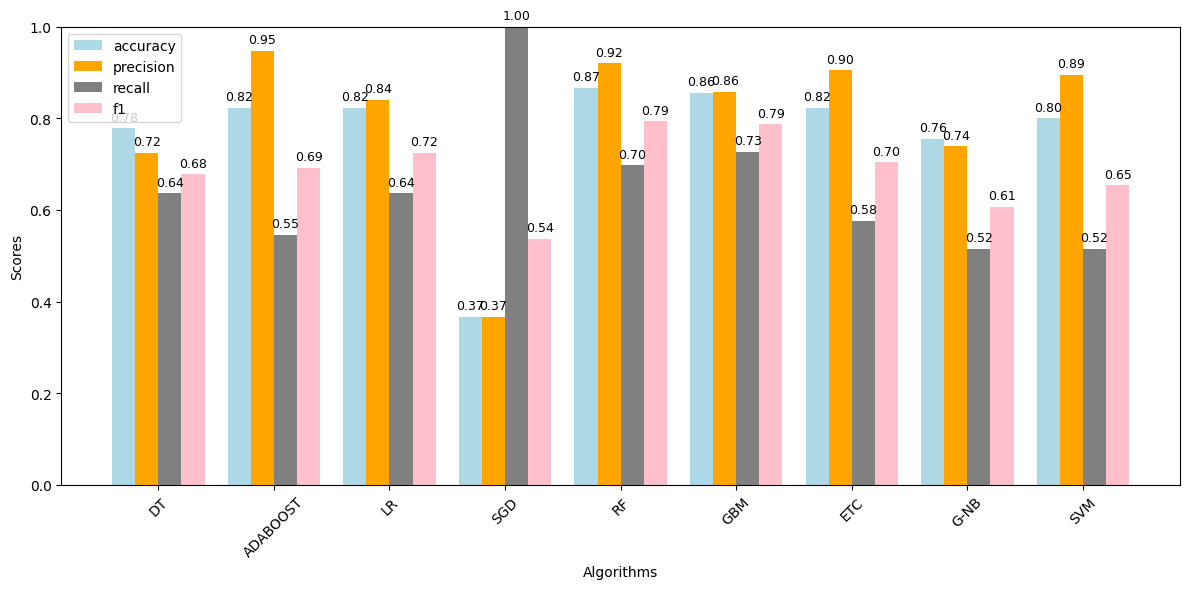

In [93]:
metrics_dict = {
    'DT': dt_grid_metrics,
    'ADABOOST': ada_grid_metrics,
    'LR': lr_metrics,
    'SGD': sgd_metrics,
    'RF': rf_grid_metrics,
    'GBM': gbm_grid_metrics,
    'ETC': et_metrics,
    'G-NB': gnb_metrics,
    'SVM': svm_grid_metrics
}
plot_metrics(metrics_dict)

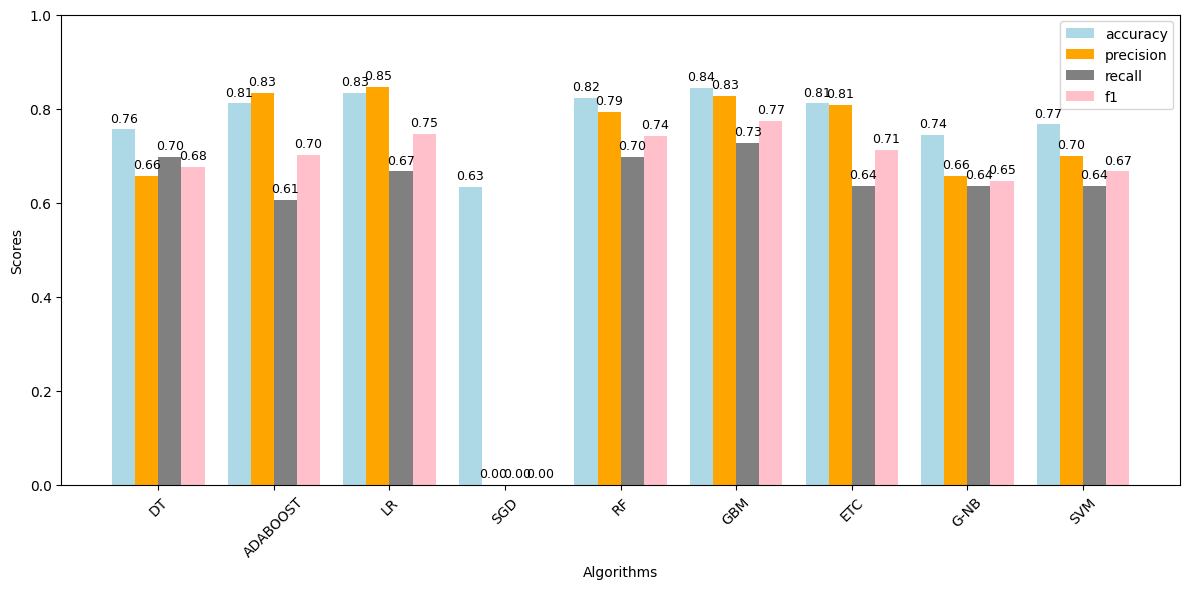

In [57]:
smote_metrics_dict = {
    'DT': dt_smote_metrics,
    'ADABOOST': ada_smote_metrics,
    'LR': lr_smote_metrics,
    'SGD': sgd_smote_metrics,
    'RF': rf_smote_metrics,
    'GBM': gbm_smote_metrics,
    'ETC': et_smote_metrics,
    'G-NB': gnb_smote_metrics,
    'SVM': svm_smote_metrics
}
plot_metrics(smote_metrics_dict)

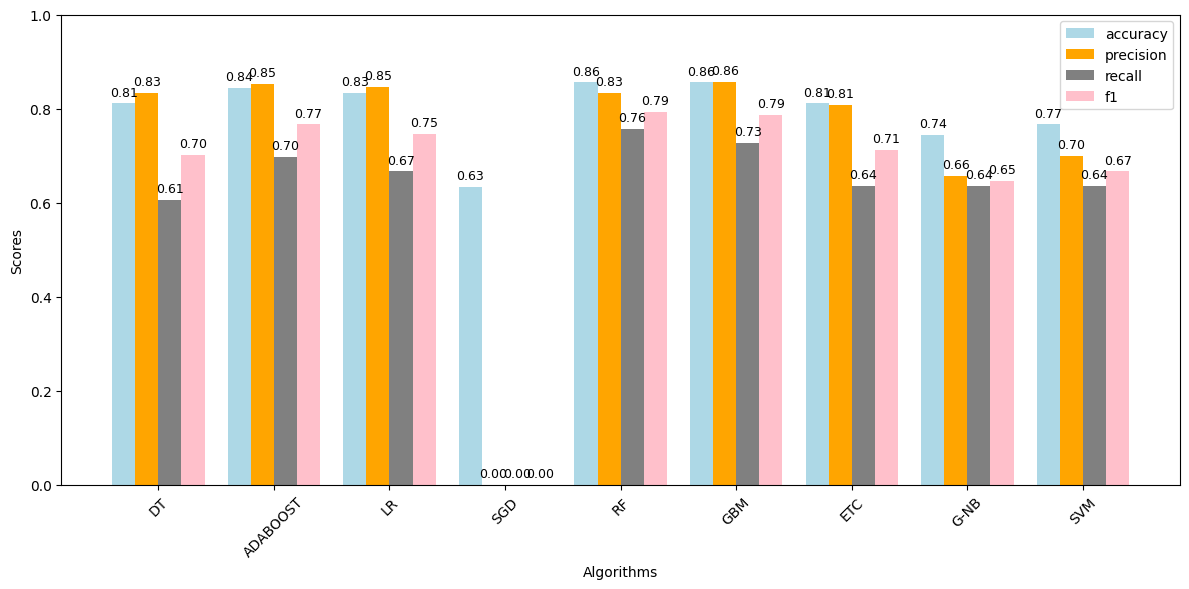

In [58]:
smote_grid_metrics_dict = {
    'DT': dt_smote_grid_metrics,
    'ADABOOST': ada_smote_grid_metrics,
    'LR': lr_smote_grid_metrics,
    'SGD': sgd_smote_grid_metrics,
    'RF': rf_smote_grid_metrics,
    'GBM': gbm_smote_grid_metrics,
    'ETC': et_smote_grid_metrics,
    'G-NB': gnb_smote_metrics,
    'SVM': svm_smote_grid_metrics
}
plot_metrics(smote_grid_metrics_dict)

# FEATURE SELECTION

In [83]:
x = x.drop(columns=['Smoking', 'Anaemia', 'Gender', 'BP'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [95]:
from decision_tree import trainDTSMOTE

new_dt_smote_metrics = trainDTSMOTE(X_train, X_test, y_train, y_test)
new_dt_smote_metrics

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        57
           1       0.67      0.73      0.70        33

    accuracy                           0.77        90
   macro avg       0.75      0.76      0.75        90
weighted avg       0.77      0.77      0.77        90



{'accuracy': [0.7666666666666667],
 'precision': [0.6666666666666666],
 'recall': [0.7272727272727273],
 'f1': [0.6956521739130435]}

In [96]:
from decision_tree import trainDTSMOTEGrid

new_dt_smote_grid_metrics = trainDTSMOTEGrid(X_train, X_test, y_train, y_test)
new_dt_smote_grid_metrics

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


{'accuracy': [0.7666666666666667],
 'precision': [0.6764705882352942],
 'recall': [0.696969696969697],
 'f1': [0.6865671641791045]}

In [97]:
from ada_boost import trainAdaSMOTE

new_ada_smote_metrics = trainAdaSMOTE(X_train, X_test, y_train, y_test)
new_ada_smote_metrics

Model Parameters: {'algorithm': 'SAMME.R', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'entropy', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 10, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__random_state': 42, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=10, random_state=42), 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 42}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'accuracy': [0.8111111111111111],
 'precision': [0.8076923076923077],
 'recall': [0.6363636363636364],
 'f1': [0.711864406779661]}

In [98]:
from ada_boost import trainAdaSMOTEGrid

new_ada_smote_grid_metrics = trainAdaSMOTEGrid(X_train, X_test, y_train, y_test)
new_ada_smote_grid_metrics

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R

Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'accuracy': [0.8444444444444444],
 'precision': [0.8518518518518519],
 'recall': [0.696969696969697],
 'f1': [0.7666666666666667]}

In [99]:
from logistic_reg import trainLRSMOTE

new_lr_smote_metrics = trainLRSMOTE(X_train, X_test, y_train, y_test)
new_lr_smote_metrics

Model Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


{'accuracy': [0.8222222222222222],
 'precision': [0.7931034482758621],
 'recall': [0.696969696969697],
 'f1': [0.7419354838709677]}

In [100]:
from logistic_reg import trainLRSMOTEGrid

new_lr_smote_grid_metrics = trainLRSMOTEGrid(X_train, X_test, y_train, y_test)
new_lr_smote_grid_metrics

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

Fitting 5 folds for each of 2800 candidates, totalling 14000 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks

Best Parameters: {'C': 0.001, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05}


{'accuracy': [0.8],
 'precision': [0.7777777777777778],
 'recall': [0.6363636363636364],
 'f1': [0.7]}

In [101]:
from stochastic_gradient import trainSGDSMOTE

new_sgd_smote_metrics = trainSGDSMOTE(X_train, X_test, y_train, y_test)
new_sgd_smote_metrics

Model Parameters: {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': [0.6333333333333333],
 'precision': [0.0],
 'recall': [0.0],
 'f1': [0.0]}

In [102]:
from stochastic_gradient import trainSGDSMOTEGrid

new_sgd_smote_grid_metrics = trainSGDSMOTEGrid(X_train, X_test, y_train, y_test)
new_sgd_smote_grid_metrics

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best Params: {'alpha': 0.0001, 'class_weight': None, 'learning_rate': 'optimal', 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'elasticnet'}
class:                precision    recall  f1-score   support

           0       0.63      1.00      0.78        57
           1       0.00      0.00      0.00        33

    accuracy                           0.63        90
   macro avg       0.32      0.50      0.39        90
weighted avg       0.40      0.63      0.49        90



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
4680 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  

{'accuracy': [0.6333333333333333],
 'precision': [0.0],
 'recall': [0.0],
 'f1': [0.0]}

In [103]:
from random_forest import trainRFSMOTE

new_rf_smote_metrics = trainRFSMOTE(X_train, X_test, y_train, y_test)
new_rf_smote_metrics

Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


{'accuracy': [0.8222222222222222],
 'precision': [0.7575757575757576],
 'recall': [0.7575757575757576],
 'f1': [0.7575757575757576]}

In [104]:
from random_forest import trainRFSMOTEGrid

new_rf_smote_grid_metrics = trainRFSMOTEGrid(X_train, X_test, y_train, y_test)
new_rf_smote_grid_metrics

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


{'accuracy': [0.8333333333333334],
 'precision': [0.8],
 'recall': [0.7272727272727273],
 'f1': [0.7619047619047619]}

In [105]:
from gradient_boosting_machine import trainGBMSMOTE

new_gbm_smote_metrics = trainGBMSMOTE(X_train, X_test, y_train, y_test)
new_gbm_smote_metrics


Model Parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


{'accuracy': [0.8444444444444444],
 'precision': [0.8064516129032258],
 'recall': [0.7575757575757576],
 'f1': [0.78125]}

In [106]:
from gradient_boosting_machine import trainGBMSMOTEGrid

new_gbm_smote_grid_metrics = trainGBMSMOTEGrid(X_train, X_test, y_train, y_test)
new_gbm_smote_grid_metrics


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Params: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}


{'accuracy': [0.8111111111111111],
 'precision': [0.75],
 'recall': [0.7272727272727273],
 'f1': [0.7384615384615385]}

In [107]:
from extra_trees import trainETSMOTE

new_et_smote_metrics = trainETSMOTE(X_train, X_test, y_train, y_test)
new_et_smote_metrics


Model Parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


{'accuracy': [0.8444444444444444],
 'precision': [0.8518518518518519],
 'recall': [0.696969696969697],
 'f1': [0.7666666666666667]}

In [108]:
from extra_trees import trainETSMOTEGrid

new_et_smote_grid_metrics = trainETSMOTEGrid(X_train, X_test, y_train, y_test)
new_et_smote_grid_metrics


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


{'accuracy': [0.8555555555555555],
 'precision': [0.8571428571428571],
 'recall': [0.7272727272727273],
 'f1': [0.7868852459016393]}

In [109]:
from gaussian_nbayes import trainGNBSMOTE

new_gnb_smote_metrics = trainGNBSMOTE(X_train, X_test, y_train, y_test)
new_gnb_smote_metrics


{'accuracy': [0.7444444444444445],
 'precision': [0.65625],
 'recall': [0.6363636363636364],
 'f1': [0.6461538461538462]}

In [110]:
from support_vector_machine import trainSVMSMOTE

new_svm_smote_metrics = trainSVMSMOTE(X_train, X_test, y_train, y_test)
new_svm_smote_metrics

Model Parameters: {'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


{'accuracy': [0.7666666666666667],
 'precision': [0.6875],
 'recall': [0.6666666666666666],
 'f1': [0.676923076923077]}

In [111]:
from support_vector_machine import trainSVMSMOTEGrid

new_svm_smote_grid_metrics = trainSVMSMOTEGrid(X_train, X_test, y_train, y_test)
new_svm_smote_grid_metrics

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params: {'C': 10, 'kernel': 'linear'}


{'accuracy': [0.7666666666666667],
 'precision': [0.7],
 'recall': [0.6363636363636364],
 'f1': [0.6666666666666666]}

In [140]:
def plot_all(metrics_dict):
    
    metrics = ['accuracy', 'f1']
    colors = ['lightblue', 'pink']
    
    # Grupları belirle
    groups = [
        ['DT_Smote', 'DT_Smote_Grid', 'DT_FS'],
        ['ADA_Smote', 'ADA_Smote_Grid', 'ADA_FS'],
        ['LR_Smote', 'LR_Smote_Grid', 'LR_FS'],
        ['SGD_Smote', 'SGD_Smote_Grid', 'SGD_FS'],
        ['RF_Smote', 'RF_Smote_Grid', 'RF_FS'],
        ['GBM_Smote', 'GBM_Smote_Grid', 'GBM_FS'],
        ['ETC_Smote', 'ETC_Smote_Grid', 'ETC_FS'],
        ['G-NB_Smote', 'G-NB_FS'],
        ['SVM_Smote', 'SVM_Smote_Grid', 'SVM_FS']
    ]

    # Grupları düzenle
    group_spacing = 1 # Gruplar arasında boşluk
    x_positions = []
    current_pos = 0

    for group in groups:
        x_positions.extend(range(current_pos, current_pos + len(group)))
        current_pos += len(group) + group_spacing

    width = 0.25  # Çubuk genişliği

    fig, ax = plt.subplots(figsize=(15, 8))

    for i, metric in enumerate(metrics):
        values = [metrics_dict[alg][metric][0] for group in groups for alg in group]
        bars = ax.bar(
            [x + i * width for x in x_positions],  # X pozisyonları
            values,                                # Değerler
            width,                                 # Çubuk genişliği
            label=metric,                          # Metrik ismi
            color=colors[i]                        # Çubuk rengi
        )

        # Çubukların üzerine değerleri yazdır
        for bar in bars:
            yval = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X pozisyonu
                yval + 0.01,                       # Y pozisyonu
                f'{yval:.2f}',                     # Yazılacak değer
                ha='center',                       # Yatay hizalama
                va='bottom',                       # Dikey hizalama
                fontsize=8                         # Yazı boyutu
            )

    # Y eksenini sabitle
    ax.set_ylim(0, 1)

    ax.set_xlabel('Algorithms')
    ax.set_ylabel('Scores')
    ax.set_xticks([x + width / 2 for x in x_positions])
    ax.set_xticklabels(
        [alg for group in groups for alg in group], rotation=90, fontsize=8
    )
    ax.legend()

    plt.tight_layout()
    plt.show()


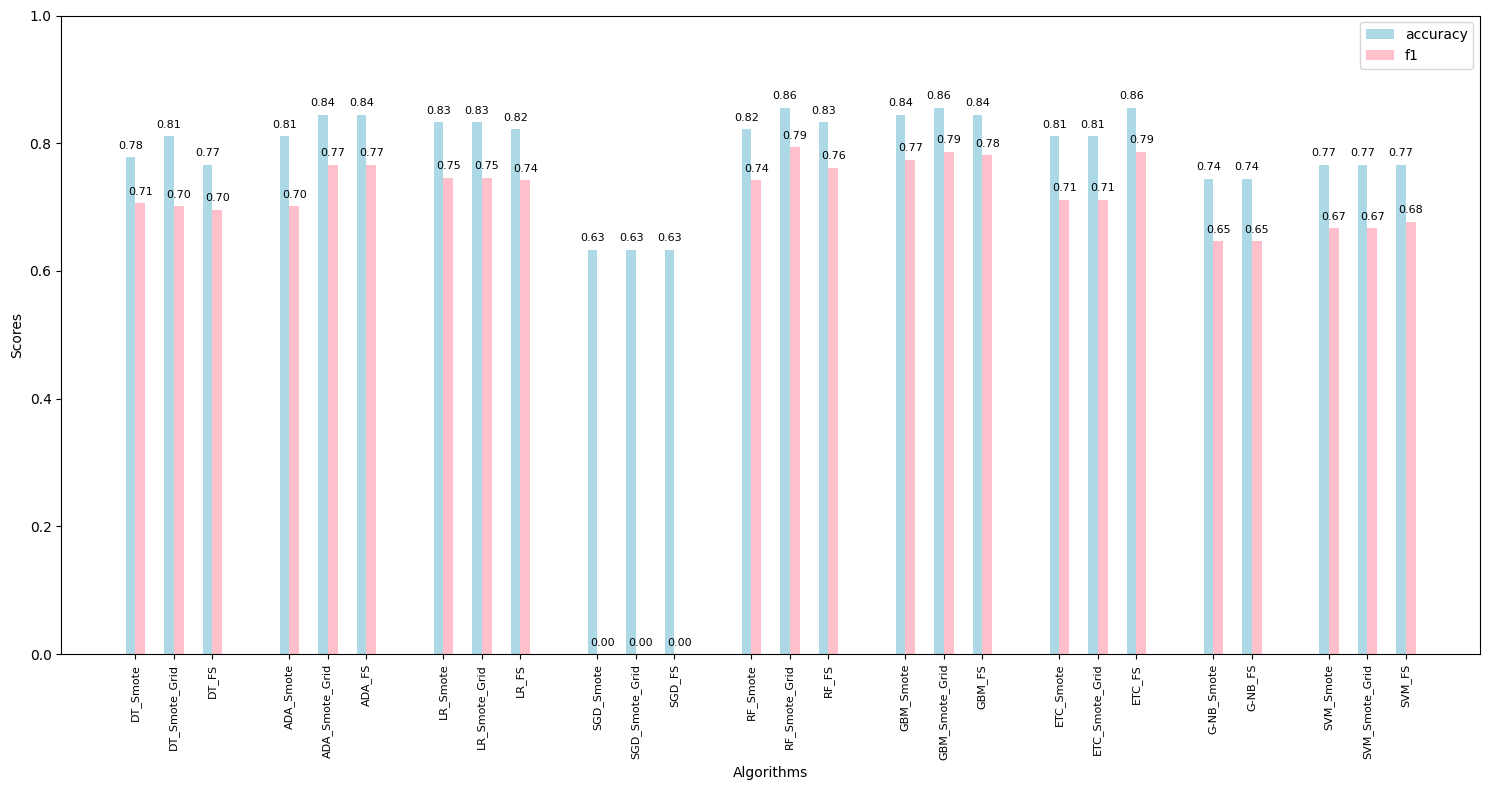

In [141]:
fs_metrics_dict = {
    'DT_Smote': dt_smote_metrics,
    'DT_Smote_Grid': dt_smote_grid_metrics,
    'DT_FS':new_dt_smote_metrics,

    'ADA_Smote': ada_smote_metrics,
    'ADA_Smote_Grid': ada_smote_grid_metrics,
    'ADA_FS':new_ada_smote_grid_metrics,


    'LR_Smote': lr_smote_metrics,
    'LR_Smote_Grid': lr_smote_grid_metrics,
    'LR_FS':new_lr_smote_metrics,


    'SGD_Smote': sgd_smote_metrics,
    'SGD_Smote_Grid': sgd_smote_grid_metrics,
    'SGD_FS':new_sgd_smote_metrics,


    'RF_Smote': rf_smote_metrics,
    'RF_Smote_Grid': rf_smote_grid_metrics,
    'RF_FS':new_rf_smote_grid_metrics,


    'GBM_Smote': gbm_smote_metrics,
    'GBM_Smote_Grid': gbm_smote_grid_metrics,
    'GBM_FS':new_gbm_smote_metrics,


    'ETC_Smote': et_smote_metrics,
    'ETC_Smote_Grid': et_smote_grid_metrics,
    'ETC_FS':new_et_smote_grid_metrics,

    'G-NB_Smote': gnb_smote_metrics,
    'G-NB_FS':new_gnb_smote_metrics,


    'SVM_Smote': svm_smote_metrics,
    'SVM_Smote_Grid': svm_smote_grid_metrics,
    'SVM_FS':new_svm_smote_metrics,
}
plot_all(fs_metrics_dict)